# LAB02 12012727 王铎磊

## Exercise 0  Importing the census 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stats


# Pretty display for notebooks
%matplotlib inline

data = pd.read_csv("census.csv")

data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [2]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

## Exercise 1  Exploration 

- n_records

In [3]:
# The total number of records
n_records = data.shape[0]
n_records

45222

- n_greater_50K

In [4]:
# The number of individuals making more than $50000 annually
n_greater_50K = data[data['income'] == '>50K'].shape[0]
n_greater_50K

11208

- n_at_most_50K

In [5]:
# The number of individuals making at most $50000 annually
n_at_most_50K = data[data['income'] == '<=50K'].shape[0]
n_at_most_50K

34014

- greater_percent

In [6]:
# The percentage of individuals making at more than $50000 annually
greater_percent = n_greater_50K/(n_greater_50K + n_at_most_50K)
greater_percent

0.2478439697492371

- Features number of every columns

In [7]:
data.nunique()

age                 74
workclass            7
education_level     16
education-num       16
marital-status       7
occupation          14
relationship         6
race                 5
sex                  2
capital-gain       121
capital-loss        97
hours-per-week      96
native-country      41
income               2
dtype: int64

## Exercise 2 Preprocessing 

### 2.1 Transforming features.

Here I use the log function and the sqrt function to get two transformed data.

In [8]:
data['Log-capital-gain'] = np.log(data['capital-gain'] + 100)
data['Sqrt-capital-gain'] = np.sqrt(data['capital-gain'])
data['Log-capital-loss'] = np.log(data['capital-gain'] + 100)
data['Sqrt-capital-loss'] = np.sqrt(data['capital-loss'])

- Capital-gain

In [9]:
# Visualize skewed continuous features of original data
#checking the skewness, kurtosis between the original and transformed data:
print("================")
print("capital-gain:")
print("-----------------")
print("Log transformation:")
print("The skewness of the original data is {}".format(data['capital-gain'].skew()))
print('The skewness of the Log transformed data is {}'.format(data['Log-capital-gain'].skew()))
print("The kurtosis of the original data is {}".format(data['capital-gain'].kurt()))
print('The kurtosis of the Log transformed data is {}'.format(data['Log-capital-gain'].kurt()))
print("-----------------")
print("Sqrt transformation:")
print("The skewness of the original data is {}".format(data['capital-gain'].skew()))
print('The skewness of the Sqrt transformed data is {}'.format(data['Sqrt-capital-gain'].skew()))
print("The kurtosis of the original data is {}".format(data['capital-gain'].kurt()))
print('The kurtosis of the Sqrt transformed data is {}'.format(data['Sqrt-capital-gain'].kurt()))

capital-gain:
-----------------
Log transformation:
The skewness of the original data is 11.789002180291192
The skewness of the Log transformed data is 3.324431993761168
The kurtosis of the original data is 150.15129227909196
The kurtosis of the Log transformed data is 9.959822671694472
-----------------
Sqrt transformation:
The skewness of the original data is 11.789002180291192
The skewness of the Sqrt transformed data is 5.868301862062873
The kurtosis of the original data is 150.15129227909196
The kurtosis of the Sqrt transformed data is 44.30593274852348


- Capital-loss

In [10]:
print("================")
print("capital-loss:")
print("-----------------")
print("Log transformation:")
print("-----------------")
print("The skewness of the original data is {}".format(data['capital-loss'].skew()))
print('The skewness of the Log transformed data is {}'.format(data['Log-capital-loss'].skew()))
print("The kurtosis of the original data is {}".format(data['capital-loss'].kurt()))
print('The kurtosis of the Log transformed data is {}'.format(data['Log-capital-loss'].kurt()))
print("-----------------")
print("Sqrt transformation:")
print("-----------------")
print("The skewness of the original data is {}".format(data['capital-loss'].skew()))
print('The skewness of the Sqrt transformed data is {}'.format(data['Sqrt-capital-loss'].skew()))
print("The kurtosis of the original data is {}".format(data['capital-loss'].kurt()))
print('The kurtosis of the Sqrt transformed data is {}'.format(data['Sqrt-capital-loss'].kurt()))

capital-loss:
-----------------
Log transformation:
-----------------
The skewness of the original data is 4.516304152981587
The skewness of the Log transformed data is 3.324431993761168
The kurtosis of the original data is 19.36396949822179
The kurtosis of the Log transformed data is 9.959822671694472
-----------------
Sqrt transformation:
-----------------
The skewness of the original data is 4.516304152981587
The skewness of the Sqrt transformed data is 4.332407162741598
The kurtosis of the original data is 19.36396949822179
The kurtosis of the Sqrt transformed data is 16.959928074742212


In [11]:
data.drop(columns=['capital-gain', 'capital-loss', 'Sqrt-capital-gain', 'Sqrt-capital-loss'], inplace = True)
data

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,Log-capital-gain,Log-capital-loss
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,<=50K,7.729296,7.729296
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,<=50K,4.605170,4.605170
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,<=50K,4.605170,4.605170
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,<=50K,4.605170,4.605170
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,<=50K,4.605170,4.605170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,40.0,United-States,<=50K,4.605170,4.605170
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,36.0,United-States,<=50K,4.605170,4.605170
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,50.0,United-States,<=50K,4.605170,4.605170
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40.0,United-States,<=50K,8.622454,8.622454


### 2.2 Normalization and Encoding

- Normalization

In [12]:
#  Data Transformation
from sklearn.preprocessing import MinMaxScaler
model = MinMaxScaler()

numerical_index = ['Log-capital-gain', 'Log-capital-loss']

data_normed = data.copy()

data_normed[numerical_index] = model.fit_transform(data_normed[numerical_index])

data_normed.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,Log-capital-gain,Log-capital-loss
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,<=50K,0.452199,0.452199
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,<=50K,0.000000,0.000000
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,<=50K,0.000000,0.000000
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,<=50K,0.000000,0.000000
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,<=50K,0.000000,0.000000


- Encoding

In [13]:
data.columns.values

array(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hours-per-week', 'native-country', 'income', 'Log-capital-gain',
       'Log-capital-loss'], dtype=object)

In [14]:
enc_index = ['workclass', 'education_level',
             'marital-status', 'occupation', 'relationship', 'race', 'sex',
             'native-country', 'income']

In [15]:
data = pd.get_dummies(data_normed, columns=enc_index, drop_first=True)

In [16]:
data.head()

,age,education-num,hours-per-week,Log-capital-gain,Log-capital-loss,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_>50K
0,39,13.0,40.0,0.452199,0.452199,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,50,13.0,13.0,0.000000,0.000000,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,38,9.0,40.0,0.000000,0.000000,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7.0,40.0,0.000000,0.000000,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13.0,40.0,0.000000,0.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exercise 3 Shuffle and Split Data

Generated the basic dataset X Y:

In [17]:
from sklearn.model_selection import train_test_split

Y = data['income_>50K']
X = data.drop('income_>50K', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0)

### Exercise 4 Evaluating Model 
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

In [18]:
from sklearn import metrics
from sklearn.naive_bayes import *
from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.neighbors import *
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [19]:
def getScore(model):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    fper, tper, thresholds = metrics.roc_curve(y_test, y_predict) 
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
    print("Accuracy:")
    print(metrics.accuracy_score(y_test, y_predict))
    print("F-Score:")
    print(metrics.f1_score(y_test, y_predict))

#### Gaussian Naive Bayes (GaussianNB)

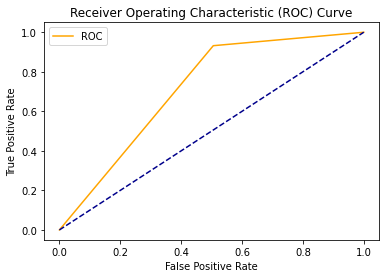

Accuracy:
0.6011055831951354
F-Score:
0.5325213785954911


In [20]:
model_GNB = GaussianNB()
getScore(model_GNB)

#### Decision Trees

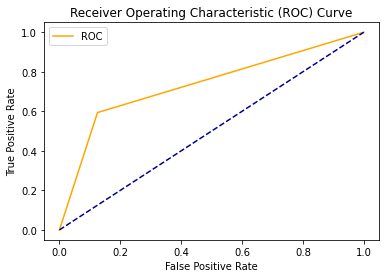

Accuracy:
0.8063018242122719
F-Score:
0.5990846681922197


In [21]:
model_DT = DecisionTreeClassifier()
getScore(model_DT)

#### Ensemble Methods (Bagging, AdaBoost, RandomForest)


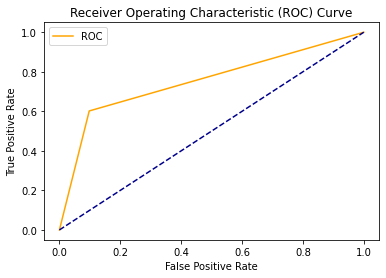

Accuracy:
0.8288557213930349
F-Score:
0.6316039980961448


In [22]:
getScore(BaggingClassifier())

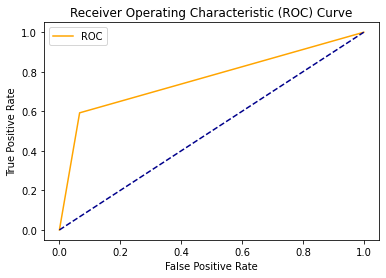

Accuracy:
0.8504145936981757
F-Score:
0.6587641866330392


In [23]:
getScore(AdaBoostClassifier())

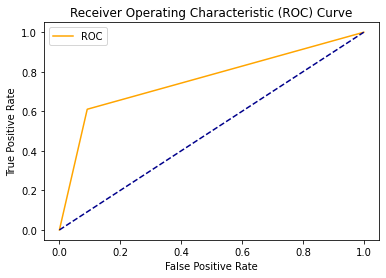

Accuracy:
0.8359314538419016
F-Score:
0.6446360153256705


In [24]:
getScore(RandomForestClassifier())

#### K-Nearest Neighbors

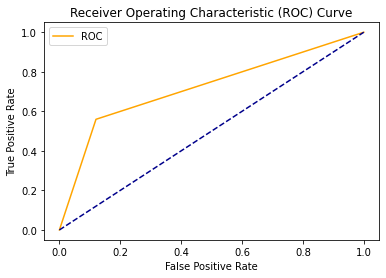

Accuracy:
0.8017689331122166
F-Score:
0.579206758976766


In [25]:
getScore(KNeighborsClassifier())

#### Support Vector Machines (SVM)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


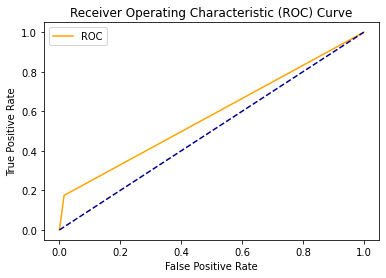

Accuracy:
0.7871752349364289
F-Score:
0.2857142857142857


In [26]:
from sklearn.svm import LinearSVC
getScore(LinearSVC())

#### Logistic Regression

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


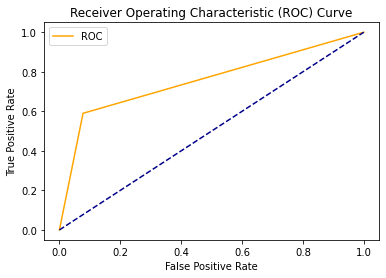

Accuracy:
0.8413488114980652
F-Score:
0.6445380232846173


In [27]:
getScore(LogisticRegression())

### Exercise 4 Questions
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

In [28]:
Y_Fake = y_test.apply(lambda x : 1)
Y_Fake.head()

41387    1
35278    1
26950    1
29133    1
41794    1
Name: income_>50K, dtype: int64

In [124]:
def getFakeScore(model):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    print("Accuracy:")
    print(metrics.accuracy_score(Y_Fake, y_predict))
    print("F-Score:")
    print(metrics.f1_score(Y_Fake, y_predict))

#### Gaussian Naive Bayes

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1009: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


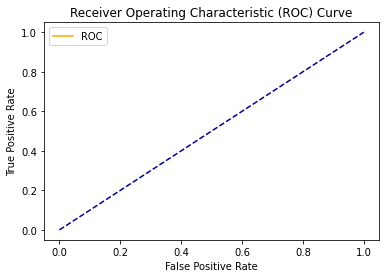

Accuracy:
0.6095080154781647
F-Score:
0.7573842560791317


In [30]:
getFakeScore(GaussianNB())

#### Decision Trees

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1009: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


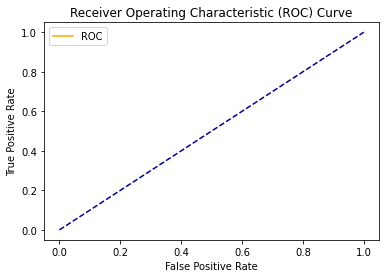

Accuracy:
0.23913764510779437
F-Score:
0.38597430406852246


In [31]:
getFakeScore(DecisionTreeClassifier())

#### Ensemble Methods

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1009: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


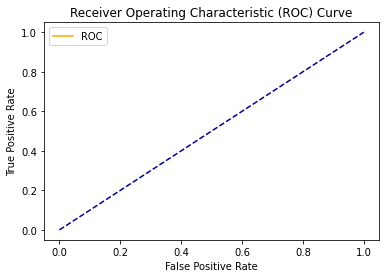

Accuracy:
0.21791044776119403
F-Score:
0.35784313725490197


In [32]:
getFakeScore(BaggingClassifier())

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1009: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


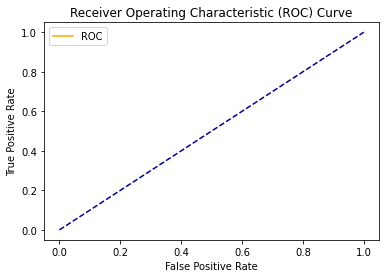

Accuracy:
0.19458264234383638
F-Score:
0.32577510411846367


In [33]:
getFakeScore(AdaBoostClassifier())

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1009: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


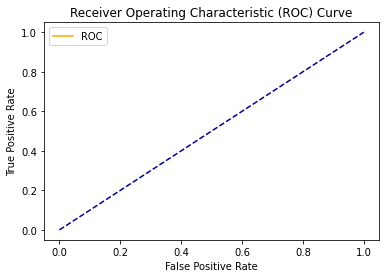

Accuracy:
0.21890547263681592
F-Score:
0.3591836734693878


In [35]:
getFakeScore(RandomForestClassifier())

#### K-Nearest Neighbors

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1009: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


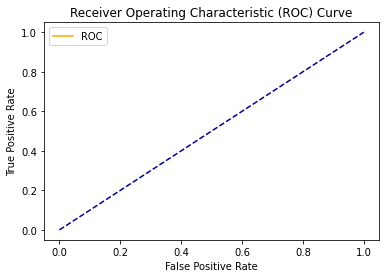

Accuracy:
0.2273079049198452
F-Score:
0.37041707954238356


In [36]:
getFakeScore(KNeighborsClassifier())

#### SVM

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1009: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


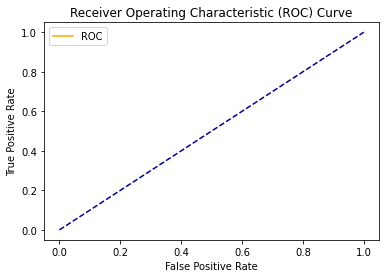

Accuracy:
0.013266998341625208
F-Score:
0.02618657937806874


In [37]:
getFakeScore(LinearSVC())

### Exercise 5 Evaluating Model 

#### Q1

In [38]:
model_randomForest = RandomForestClassifier()
model_randomForest.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
importances = model_randomForest.feature_importances_

In [40]:
indices = np.argsort(importances)

<Figure size 1440x144 with 0 Axes>

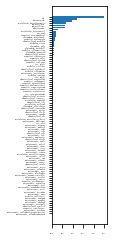

In [133]:
import matplotlib.ticker as ticker

# plt.rc('font',family='Times New Roman',size=2)

plt.figure(figsize=(20, 2))

fig, ax = plt.subplots()
ax.get_autoscale_on()

ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])
ax.set_aspect(0.01)

plt.savefig("result.jpg", dpi = 1000)

#### Q2

如利用朴素贝叶斯模型对垃圾邮件进行分类。

#### Q3

分类原理简单，分类效率高。能够进行多分类任务。

可以增量学习，可以处理缺失值。

#### Q4

实际情况往往不满足变量之间相互独立的假设。

#### Q5

- 对于多分类问题，可以考虑朴素贝叶斯。

- 如果给定数据集的自变量是标签类变量，即每个坐标都是从一个有限的标签集合中选取值。假设变量之间独立同分布，使用朴素贝叶斯而言会很方便。

- 数据可能无法一下计算完全，需要分步骤进行模型生成，可以考虑朴素贝叶斯。